In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# DSM Step 2 - Data Wrangling

Need to load the data provided, get an understanding of what is in each file and prepare for EDA stage.

In [2]:
os.chdir("data")

In [3]:
os.listdir()

['Cust w Industry a Last Purchased.xlsx',
 'REPEATSALE Items Purchased Report 2015 2020 dept 700.XLS',
 'Revised Customer Ranking Report 2015-2020.xlsx',
 'Sales Report by Zip Code (2010-2020).pdf',
 'Tele-Rad County Opportunity 1.18.19.xlsx',
 'Tele-Rad County Opportunty Detail 2019.xlsx',
 'Tele-Rad County Ownership 1.18.19.xlsx',
 'Tele-Rad Product Mix 8.5.2020.pdf',
 'Tele-Rad Product Trend Data.xlsx']

## File 1: Cust w Industry 

This file contains the identifying information for each customer, save customer name has been replaced with an Account Number for privacy purposes.

In [4]:
customers = pd.read_excel('Cust w Industry a Last Purchased.xlsx', header=0)
print(customers.head())
# This file lists the last purchase of each customer, and the customer's "vertical"
print(customers[customers['Account Number']=='1OTTSD'])

  Industry/Vertical     Contact Owner Account Number    City State/Province  \
0    911 & Dispatch     Keith Johnson         1ALLCD     NaN            NaN   
1    911 & Dispatch  Jessica Spindler         1ALPCO  ALPENA             MI   
2    911 & Dispatch  Jessica Spindler         7BENCS  BEULAH             MI   
3    911 & Dispatch  Jessica Spindler         7CCECD     NaN            NaN   
4    911 & Dispatch     Tom Gillespie         4EDWFD     NaN            NaN   

   Postal/ZIP Last Purchased  
0         NaN     2020-05-18  
1  49707-2453     2020-02-13  
2       49617     2019-07-29  
3         NaN     2020-05-18  
4         NaN     2020-01-24  
    Industry/Vertical  Contact Owner Account Number City State/Province  \
545   Law Enforcement  Keith Johnson         1OTTSD  NaN            NaN   

    Postal/ZIP Last Purchased  
545        NaN     2020-05-08  


In [5]:
# Examine datatypes
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Industry/Vertical  805 non-null    object        
 1   Contact Owner      805 non-null    object        
 2   Account Number     805 non-null    object        
 3   City               206 non-null    object        
 4   State/Province     207 non-null    object        
 5   Postal/ZIP         206 non-null    object        
 6   Last Purchased     619 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 44.1+ KB


In [6]:
# How many of the Zip, City, State are missing?
print('% missing of Zip: {:.2f}'.format(customers['Postal/ZIP'].isnull().sum() / len(customers['Postal/ZIP'])))
print('% missing of City: {:.2f}'.format(customers['City'].isnull().sum() / len(customers['City'])))
print('% missing of State: {:.2f}'.format(customers['State/Province'].isnull().sum() / len(customers['State/Province'])))

% missing of Zip: 0.74
% missing of City: 0.74
% missing of State: 0.74


74% of Zip/City/State are missing. There isn't a way to systematically look this up in this data file since no customer names. Will drop unless can find something helpful elsewhere.

Note from review - the Customer Ranking includes Zip codes, which can be used.

From talking to Micah, they use county as their primary internal unit of geography. I'll grab the ZIP codes from the customer ranking data, then turn that into a county column. 

In [7]:
# Drop city/state - ZIP will be the value used for TR's purposes
customers.drop(['City','State/Province'], axis=1, inplace=True)

### Categorical Data
Three of the columns - contact owner, account number & industry/vertical - seem like they should be categorical.

In [8]:
# Categorical data - 1) Industry/Vertical

# Industry/Vertical - there are some misspellings and things to clean up
customers['Industry/Vertical'].unique()

array(['911 & Dispatch', 'Agriculture', 'Argiculture',
       'College & Universities', 'Colleges & Universities',
       'Colleges and Universities', 'Construction', 'Fire & EMS',
       'Government Services', 'Healthcare', 'Hopitality', 'Hospitality',
       'hospitality', 'K12 Education', 'Law Enforcement', 'Manufacturing',
       'Mining', 'Mining & Materials', 'Oil & Gas', 'Property Management',
       'Religious Institutions', 'Retail', 'Security', 'Service',
       'Services & Training', 'Telecommunications', 'Transportation',
       'Utilities', 'Warehousing'], dtype=object)

When it comes to unique categories I see:
* 911 & Dispatch
* Agriculture (argiculture)
* Colleges & Universities (college & universities, colleges and universities)
* Construction
* Fire & EMS
* Gov't Services
* Healthcare
* Hospitality (Hopitality, hospitality)
* K12 Education
* Law Enforcement
* Manufacturing
* Mining & Materials (mining)
* Oil & Gas
* Property Management
* Religious Institutions
* Retail
* Security
* Services & Training (service)
* Telecommunications
* Transportation
* Utilities
* Warehousing

22 unique categories

In [9]:
# Define a function to map misspelled ones
def map_verticals(item):
    lookup = {
        'Argiculture':'Agriculture',
        'College & Universities':'Colleges & Universities',
        'Colleges and Universities':'Colleges & Universities',
        'Hopitality':'Hospitality',
        'hospitality':'Hospitality',
        'Mining':'Mining & Materials',
        'Service':'Services & Training'
    }
    
    if item in lookup.keys():
        return lookup[item]
    else: 
        return item

In [10]:
# Apply function
customers['Industry/Vertical'] = customers['Industry/Vertical'].apply(map_verticals)
print(customers['Industry/Vertical'].unique())
print(len(customers['Industry/Vertical'].unique()))

['911 & Dispatch' 'Agriculture' 'Colleges & Universities' 'Construction'
 'Fire & EMS' 'Government Services' 'Healthcare' 'Hospitality'
 'K12 Education' 'Law Enforcement' 'Manufacturing' 'Mining & Materials'
 'Oil & Gas' 'Property Management' 'Religious Institutions' 'Retail'
 'Security' 'Services & Training' 'Telecommunications' 'Transportation'
 'Utilities' 'Warehousing']
22


In [11]:
# Change dtype to category
customers['Industry/Vertical'] = customers['Industry/Vertical'].astype('category')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Industry/Vertical  805 non-null    category      
 1   Contact Owner      805 non-null    object        
 2   Account Number     805 non-null    object        
 3   Postal/ZIP         206 non-null    object        
 4   Last Purchased     619 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(3)
memory usage: 26.9+ KB


__Categorical Data 2:__ Contact Owners

In [12]:
# Contact Owners
customers['Contact Owner'].unique()

array(['Keith Johnson', 'Jessica Spindler', 'Tom Gillespie',
       'Patrick McBride', 'Pat McBride', 'Kelly Hoek', 'Skip Petrovich'],
      dtype=object)

In [13]:
# Change Patrick McBride to Pat McBride
customers['Contact Owner'].replace('Patrick McBride', 'Pat McBride', inplace=True)
customers['Contact Owner'] = customers['Contact Owner'].astype('category')
customers['Contact Owner'].value_counts()

Jessica Spindler    195
Pat McBride         134
Kelly Hoek          132
Keith Johnson       129
Tom Gillespie       124
Skip Petrovich       91
Name: Contact Owner, dtype: int64

__Categorical Data 3:__ Account Number.

This will also serve as the index/reference for each customer

In [14]:
customers['Account Number'] = customers['Account Number'].astype('category')

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Industry/Vertical  805 non-null    category      
 1   Contact Owner      805 non-null    category      
 2   Account Number     805 non-null    category      
 3   Postal/ZIP         206 non-null    object        
 4   Last Purchased     619 non-null    datetime64[ns]
dtypes: category(3), datetime64[ns](1), object(1)
memory usage: 63.1+ KB


In [16]:
customers.set_index(['Account Number'], drop=True, inplace=True)
customers.head()

,Industry/Vertical,Contact Owner,Postal/ZIP,Last Purchased
Account Number,,,,
1ALLCD,911 & Dispatch,Keith Johnson,NaN,2020-05-18
1ALPCO,911 & Dispatch,Jessica Spindler,49707-2453,2020-02-13
7BENCS,911 & Dispatch,Jessica Spindler,49617,2019-07-29
7CCECD,911 & Dispatch,Jessica Spindler,NaN,2020-05-18
4EDWFD,911 & Dispatch,Tom Gillespie,NaN,2020-01-24


__Last Purchased:__

This final column is missing some data, but let's look at it more closely.

In [17]:
customers['Last Purchased'].describe()

count                     619
unique                    253
top       2020-04-30 00:00:00
freq                       37
first     2012-01-26 00:00:00
last      2020-05-18 00:00:00
Name: Last Purchased, dtype: object

This goes back to 2012. The full sales data the provided me goes back to 2015, so if missing values here mean last sale was a while back, those rows likely would end up getting dropped anyway.

I'll leave this column alone for now, but check it against full sales data to see if I can determine if a blank entry here simply means last purchase was long ago.

## File 2: REPEATSALE Items Purchased 2015-2020

This is a list of all the sales of communications equipment from 2015 to 2020.

In [18]:
sales = pd.read_excel('REPEATSALE Items Purchased Report 2015 2020 dept 700.XLS', header=0)
sales.head()

,CUSTOMER #,ORDER TYPE,ORDER #,INVOICE DATE,QTY SHIPPED,ITEM #,DESCRIPTION,ITEM PRICE
0,1HOLPS,O,16588,05/08/15,1.0,T3000,MOTO MTR3000 BASE RADIO,6020.8
1,1EACCD,O,17800,12/31/15,2.0,ADP-U,"UNIVERSAL PIPE MOUNT 4-1/2""",519.0
2,1EACCD,O,17800,12/31/15,1.0,CONTINGENCY,CONTINGENCY,5000.0
3,1VANAI,O,17887,04/17/15,2.0,AAM27QNH9LA1,XPR 4550 403-470 1-25W 160 CH,681.0
4,1VANAI,O,17887,04/17/15,2.0,SEC1223MOTOTRBO,SAMLEX BASE STATION PWR SUPPLY,156.0


In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CUSTOMER #    11418 non-null  object 
 1   ORDER TYPE    11418 non-null  object 
 2   ORDER #       11418 non-null  int64  
 3   INVOICE DATE  11418 non-null  object 
 4   QTY SHIPPED   11418 non-null  float64
 5   ITEM #        11418 non-null  object 
 6   DESCRIPTION   11399 non-null  object 
 7   ITEM PRICE    11418 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 713.8+ KB


__Initial Thoughts:__
There are some data types to fix first off. 
Only one column is missing data here - description. That column should tie to Item #, so we likely could drop it anyway. I'll double check that first.

The first thing that stands out though is the order type column.

In [20]:
# Check order type
sales['ORDER TYPE'].value_counts()

O    11418
Name: ORDER TYPE, dtype: int64

In [21]:
# All Order Types are the same, so can drop that column
sales.drop('ORDER TYPE', axis=1, inplace=True)
sales.head()

,CUSTOMER #,ORDER #,INVOICE DATE,QTY SHIPPED,ITEM #,DESCRIPTION,ITEM PRICE
0,1HOLPS,16588,05/08/15,1.0,T3000,MOTO MTR3000 BASE RADIO,6020.8
1,1EACCD,17800,12/31/15,2.0,ADP-U,"UNIVERSAL PIPE MOUNT 4-1/2""",519.0
2,1EACCD,17800,12/31/15,1.0,CONTINGENCY,CONTINGENCY,5000.0
3,1VANAI,17887,04/17/15,2.0,AAM27QNH9LA1,XPR 4550 403-470 1-25W 160 CH,681.0
4,1VANAI,17887,04/17/15,2.0,SEC1223MOTOTRBO,SAMLEX BASE STATION PWR SUPPLY,156.0


__Other notes on columns:__
* Customer # - should match up with Account Numbers
* Order # - should serve as index for the sales dataframe
* Invoice Date - should be a datetime dtype
* 

Other columns all fairly self explanatory. Need to explore them in EDA stage.

In [14]:
sales.set_index(['ORDER #'], drop=True, inplace=True)
sales.head()

,CUSTOMER #,ORDER TYPE,INVOICE DATE,QTY SHIPPED,ITEM #,DESCRIPTION,ITEM PRICE
ORDER #,,,,,,,
16588,1HOLPS,O,05/08/15,1.0,T3000,MOTO MTR3000 BASE RADIO,6020.8
17800,1EACCD,O,12/31/15,2.0,ADP-U,"UNIVERSAL PIPE MOUNT 4-1/2""",519.0
17800,1EACCD,O,12/31/15,1.0,CONTINGENCY,CONTINGENCY,5000.0
17887,1VANAI,O,04/17/15,2.0,AAM27QNH9LA1,XPR 4550 403-470 1-25W 160 CH,681.0
17887,1VANAI,O,04/17/15,2.0,SEC1223MOTOTRBO,SAMLEX BASE STATION PWR SUPPLY,156.0


In [15]:
# Confirm that Customer # from sales data match up with Account Number from customer data
sales_list = list(sales['CUSTOMER #'].unique())
customer_list = list(customers.index)
print(len(sales_list), len(customer_list))

634 805


Lengths are different. It appears there are 171 customers that are in the customer list (i.e. have a customer record) but NOT in the sales list (i.e. haven't made a purchase in the 2015 to 2020 window).

In [16]:
# Create a list of the customer Accounts that don't show up on the sales reports
differences1 = np.setdiff1d(customer_list, sales_list, assume_unique=True)
len(differences1)

338

So actually it appears there are 338 customers that don't appear in the sales data. There's likely some of the sales reports that aren't in the customer data.

In [17]:
# Create a list of the accounts that ARE in the sales list but not the customer
differences2 = np.setdiff1d(sales_list, customer_list, assume_unique=True)
len(differences2)

167

It looks like there were a total of 467 customers (out of the original 805) that did NOT make a purchase of the items included in the sales data.

In [18]:
# Create list of Account Numbers that had last sale prior to 2015
no_sale_post2015 = customers[customers['Last Purchased'] < '2015']
len(no_sale_post2015)

29

Hm, so there were only 29 on that customer list that had a last sale prior to 2015. The rest must not be showing up in the sales data for another reason.

__Need to learn more from Micah/Marissa about what the sales data I rec'd is/isn't__

Ultimately I'll likely end up merging the sales/customer data so any irrelevant account numbers won't factor in. But want to make sure there isn't data I'm missing or that could help illuminate this so we could incude more data overall.

## File 3: Revised Customer Ranking Report 2015-2020

This looks like a ranking of total sales by customer including their initial sale date. 

Could use this to create things like length of time as a customer.

In [19]:
customer_totals = pd.read_excel('Revised Customer Ranking Report 2015-2020.xlsx', header=1)
customer_totals.head()
# This file lists lifetime sales by customer, along with that customer's "start date" aka initial
# sale.

,Rank,Customer,Amount,Address 2,Address 3,Open Date
0,1,1MIPMA,2791114.69,IL,,11/01/1999
1,2,1MOTMS,1544416.02,***DO NOT/SEND TO MOTOROLA***,MI,2/15/2002
2,3,1FOURW,1123935.02,11111 WILSON ROAD,NEW BUFFALO MI 49117,1/29/2008
3,4,7CCECD,1011834.96,PETOSKEY MI 49770,,11/01/1999
4,5,1OTTSD,848407.03,WEST OLIVE MI 49460,,11/01/1999


In [20]:
# How many customers in this file?
len(customer_totals['Customer'])

1070

This list of customers contains 1070, compared to the 805 in the original list of customers. 

In [21]:
# How many of these customers are missing addresses?
print(customer_totals['Address 2'].value_counts())
print(customer_totals['Address 2'].isnull().sum() / len(customer_totals['Address 2']))

HOLLAND MI 49423            37
HOLLAND MI 49424            22
GRAND RAPIDS MI 49503       21
ZEELAND MI 49464            16
CADILLAC MI 49601           14
                            ..
IL 60196                     1
PO BOX 8                     1
2380 RILEY STREET            1
ST IGNACE MI 49781           1
NEW BOSTON MI 48164-9265     1
Name: Address 2, Length: 651, dtype: int64
0.0


None are missing addresses! Sweet! Can use that information to populate the Zip at least.

In [22]:
### Step to do: parse zip codes from the addresses for as many of these as I can
### Will merge this information with my customers dataframe to add these additional details to it

## File 4: Sales Report by Zip Code"

This file is being set aside. It includes total sales by zip code from 2010 to 2020. The issues are:
* that timeframe doesn't match with the 2015 to 2020 timeframe of the rest of the data
* it is completely aggregated by zip with no way of breaking it out any further
* with a list of all the sales I can re-create this kind of "gouped by zip code" data easily, and ONLY for the time frame that matches the rest of the data

## Files 5 & 6: TR county Opp Detail 2019 & 1.18.19

Not loading this in yet until I confirm my understanding. This could be useful for visualizations.

In [23]:
### This was my code to load the data before...dont' remember what _tr was....
### Setting all this aside for now until I have conversation with them
# Load county data
#county_2018 = pd.read_excel('Tele-Rad County Opportunity 1.18.19.xlsx', header=0, usecols=[1,2,3,4,5,6])
#county_2019 = pd.read_excel('Tele-Rad County Opportunty Detail 2019.xlsx', usecols=[1,2,3,4,5,6])
#county_tr2017 = pd.read_excel('Tele-Rad County Ownership 1.18.19.xlsx', header=1, 
#                              usecols=[0,2,3,4])
#county_tr2018 = pd.read_excel('Tele-Rad County Ownership 1.18.19.xlsx', header=1, 
#                              usecols=[0,5,6,7])

## File 7: TR County Ownership

Same as above, need a deeper conversation/understanding

## File 8: TR Product Mix

This was a visualization of total sales by product. Micah sent me the details. Will use that information instead

## File 9: TR Product Trend Data

I'm not really understanding this all that well

# DSM Step 3: EDA

In [24]:
customers.head()

,Industry/Vertical,Contact Owner,City,State/Province,Postal/ZIP,Last Purchased
Account Number,,,,,,
1ALLCD,911 & Dispatch,Keith Johnson,NaN,NaN,NaN,2020-05-18
1ALPCO,911 & Dispatch,Jessica Spindler,ALPENA,MI,49707-2453,2020-02-13
7BENCS,911 & Dispatch,Jessica Spindler,BEULAH,MI,49617,2019-07-29
7CCECD,911 & Dispatch,Jessica Spindler,NaN,NaN,NaN,2020-05-18
4EDWFD,911 & Dispatch,Tom Gillespie,NaN,NaN,NaN,2020-01-24


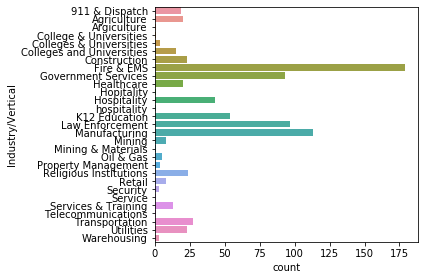

In [25]:
sns.countplot(y='Industry/Vertical', data=customers)
plt.tight_layout()

In [26]:
# Clean up industry/verticals
customers['Industry/Vertical'].unique()

array(['911 & Dispatch', 'Agriculture', 'Argiculture',
       'College & Universities', 'Colleges & Universities',
       'Colleges and Universities', 'Construction', 'Fire & EMS',
       'Government Services', 'Healthcare', 'Hopitality', 'Hospitality',
       'hospitality', 'K12 Education', 'Law Enforcement', 'Manufacturing',
       'Mining', 'Mining & Materials', 'Oil & Gas', 'Property Management',
       'Religious Institutions', 'Retail', 'Security', 'Service',
       'Services & Training', 'Telecommunications', 'Transportation',
       'Utilities', 'Warehousing'], dtype=object)